# Projeto 2
O objetivo desse projeto é trabalhar com imagens no domínio da frequência, lidando com filtros e compressão.

# Setup
Setup inicial, ao final deveria aparecer a imagem desejada

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install opencv-python

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


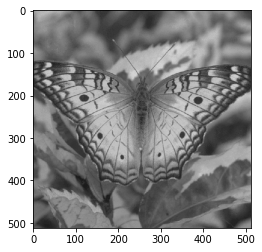

In [2]:
# Test setup, should show the baboon.png image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# open image file and stores it in a numpy array
img = io.imread('png_images/butterfly.png')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

# Fast Fourier Transform - FFT
Vamos tentar pegar uma imagem e converter ela para o o espectro do Fourier e dai fazer a transformação inversar para imagem original

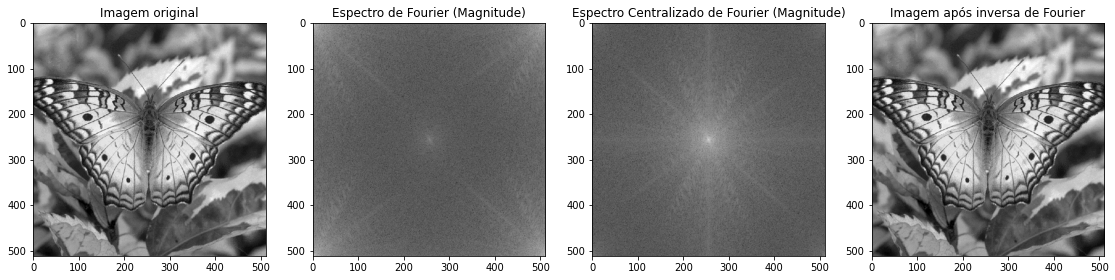

In [3]:
# Test setup, should show the baboon.png image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

# open image file and stores it in a numpy array
img = io.imread('png_images/butterfly.png')

img_c2 = np.fft.fft2(img)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifft2(img_c2)

plt.subplot(141), plt.imshow(img, "gray"), plt.title("Imagem original")
plt.subplot(142), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Espectro de Fourier (Magnitude)")
plt.subplot(143), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Espectro Centralizado de Fourier (Magnitude)")
plt.subplot(144), plt.imshow(np.abs(img_c4), "gray"), plt.title("Imagem após inversa de Fourier")

plt.savefig('results/basicFFT.png', bbox_inches='tight')

# Filtros aplicados no domínio da frequência
Os filtros aplicados a baixo usaram algoritímos prontos apresenatos nesse [artigo](https://medium.com/@hicraigchen/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82) como base, sofrendo leve alterações
## Passa Baixa

In [4]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def lowPass(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

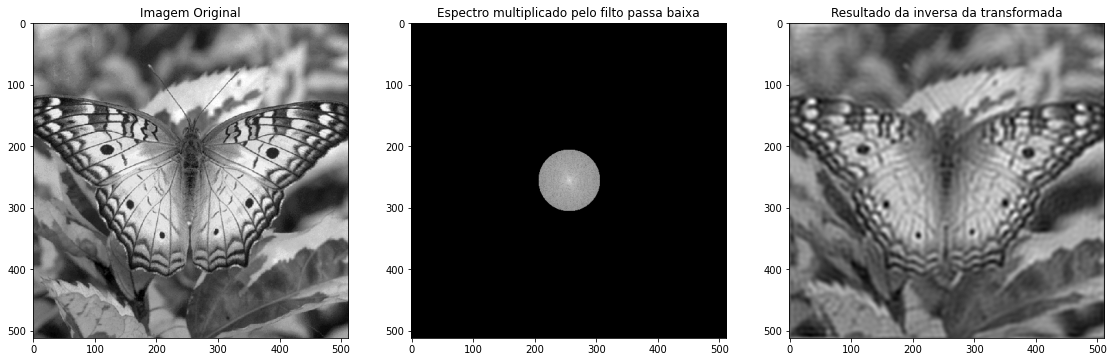

In [5]:

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

original = np.fft.fft2(img)
center = np.fft.fftshift(original)
LowPassCenter = center * lowPass(50,img.shape)
inverse_LowPass = np.fft.ifft2(LowPassCenter)


img = io.imread('png_images/butterfly.png')
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Imagem Original")
plt.subplot(132), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Espectro multiplicado pelo filto passa baixa")
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Resultado da inversa da transformada")

plt.savefig('results/lowPass.png', bbox_inches='tight')

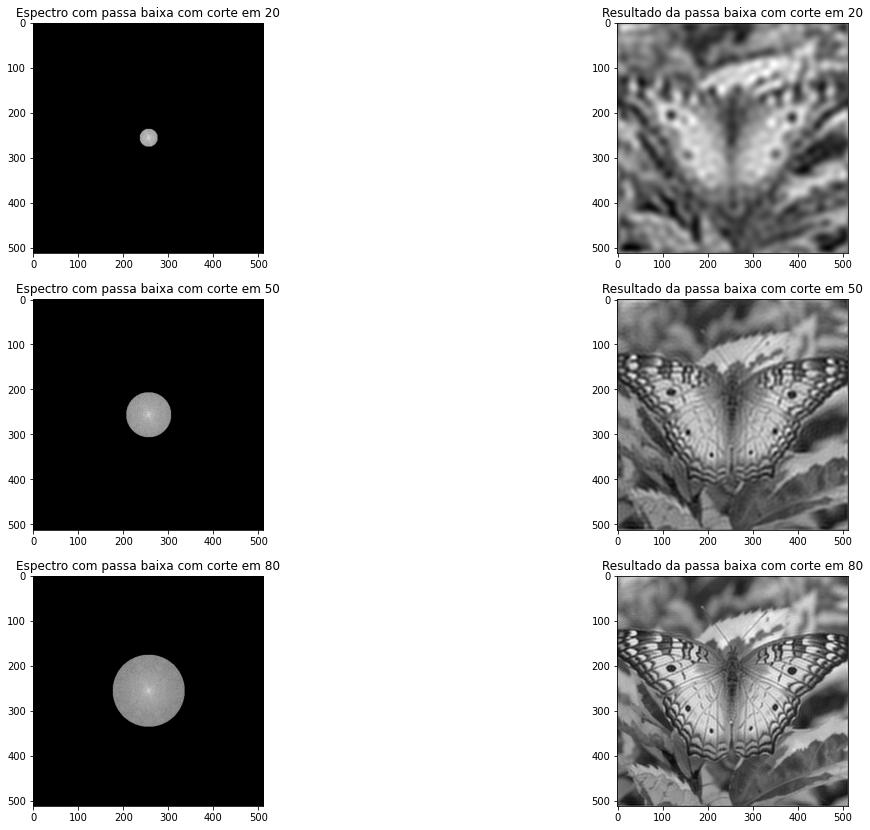

In [6]:
img = io.imread('png_images/butterfly.png')
original = np.fft.fft2(img)
center = np.fft.fftshift(original)
lp20 = center * lowPass(20,img.shape)
lp50 = center * lowPass(50,img.shape)
lp80 = center * lowPass(80,img.shape)

i_lp20 = np.fft.ifft2(lp20)
i_lp50 = np.fft.ifft2(lp50)
i_lp80 = np.fft.ifft2(lp80)

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)
img = io.imread('png_images/butterfly.png')
plt.subplot(321), plt.imshow(np.log(1+np.abs(lp20)), "gray"), plt.title("Espectro com passa baixa com corte em 20")
plt.subplot(322), plt.imshow(np.abs(i_lp20), "gray"), plt.title("Resultado da passa baixa com corte em 20")

plt.subplot(323), plt.imshow(np.log(1+np.abs(lp50)), "gray"), plt.title("Espectro com passa baixa com corte em 50")
plt.subplot(324), plt.imshow(np.abs(i_lp50), "gray"), plt.title("Resultado da passa baixa com corte em 50")

plt.subplot(325), plt.imshow(np.log(1+np.abs(lp80)), "gray"), plt.title("Espectro com passa baixa com corte em 80")
plt.subplot(326), plt.imshow(np.abs(i_lp80), "gray"), plt.title("Resultado da passa baixa com corte em 80")


plt.savefig('results/lowPassFreqComp.png', bbox_inches='tight')

## Passa alta

In [7]:
def highPass(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

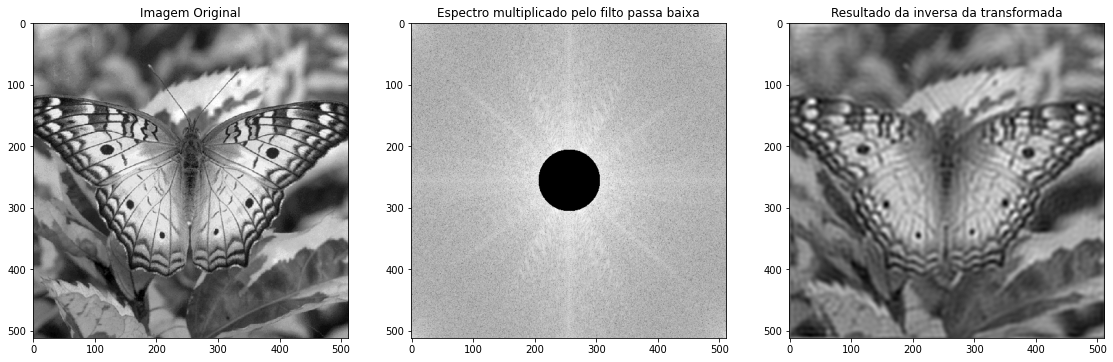

In [8]:
plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

original = np.fft.fft2(img)
center = np.fft.fftshift(original)
HighPassCenter = center * highPass(50,img.shape)
inverse_HighPass = np.fft.ifft2(LowPassCenter)


img = io.imread('png_images/butterfly.png')
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Imagem Original")
plt.subplot(132), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Espectro multiplicado pelo filto passa baixa")
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Resultado da inversa da transformada")

plt.savefig('results/highPass.png', bbox_inches='tight')

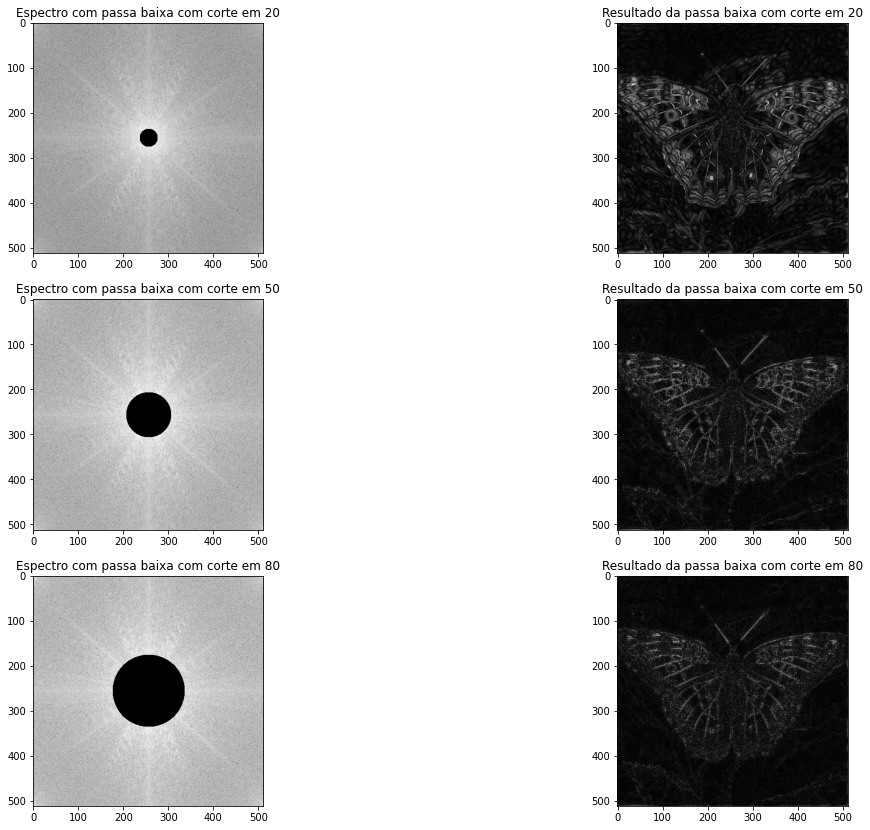

In [9]:
img = io.imread('png_images/butterfly.png')
original = np.fft.fft2(img)
center = np.fft.fftshift(original)
lp20 = center * highPass(20,img.shape)
lp50 = center * highPass(50,img.shape)
lp80 = center * highPass(80,img.shape)

i_lp20 = np.fft.ifft2(lp20)
i_lp50 = np.fft.ifft2(lp50)
i_lp80 = np.fft.ifft2(lp80)

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)
img = io.imread('png_images/butterfly.png')
plt.subplot(321), plt.imshow(np.log(1+np.abs(lp20)), "gray"), plt.title("Espectro com passa baixa com corte em 20")
plt.subplot(322), plt.imshow(np.abs(i_lp20), "gray"), plt.title("Resultado da passa baixa com corte em 20")

plt.subplot(323), plt.imshow(np.log(1+np.abs(lp50)), "gray"), plt.title("Espectro com passa baixa com corte em 50")
plt.subplot(324), plt.imshow(np.abs(i_lp50), "gray"), plt.title("Resultado da passa baixa com corte em 50")

plt.subplot(325), plt.imshow(np.log(1+np.abs(lp80)), "gray"), plt.title("Espectro com passa baixa com corte em 80")
plt.subplot(326), plt.imshow(np.abs(i_lp80), "gray"), plt.title("Resultado da passa baixa com corte em 80")


plt.savefig('results/highPassFreqComp.png', bbox_inches='tight')

## Passa Faixa

In [10]:
def bandPass(D0, W, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) >= D0 - W/2 and distance((y,x),center) <= D0 + W/2:
                base[y,x] = 1
    return base

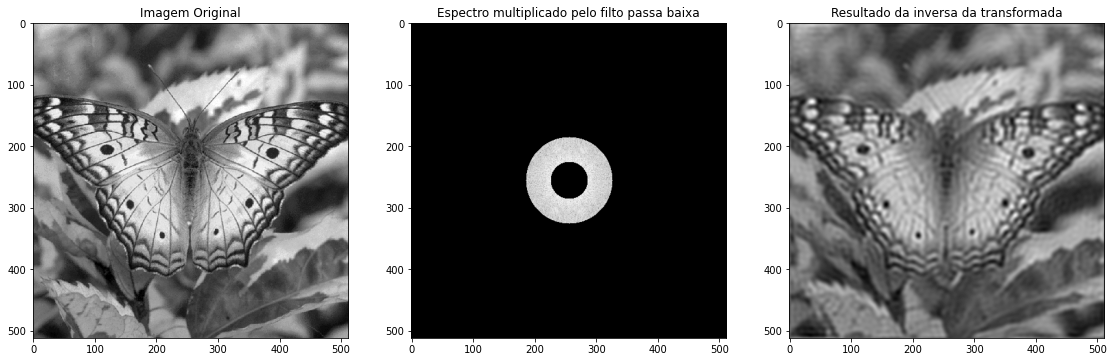

In [11]:
plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

original = np.fft.fft2(img)
center = np.fft.fftshift(original)
bandPassCenter = center * bandPass(50, 40, img.shape)
inverse_BandPass = np.fft.ifft2(LowPassCenter)


img = io.imread('png_images/butterfly.png')
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Imagem Original")
plt.subplot(132), plt.imshow(np.log(1+np.abs(bandPassCenter)), "gray"), plt.title("Espectro multiplicado pelo filto passa baixa")
plt.subplot(133), plt.imshow(np.abs(inverse_BandPass), "gray"), plt.title("Resultado da inversa da transformada")

plt.savefig('results/bandPass.png', bbox_inches='tight')

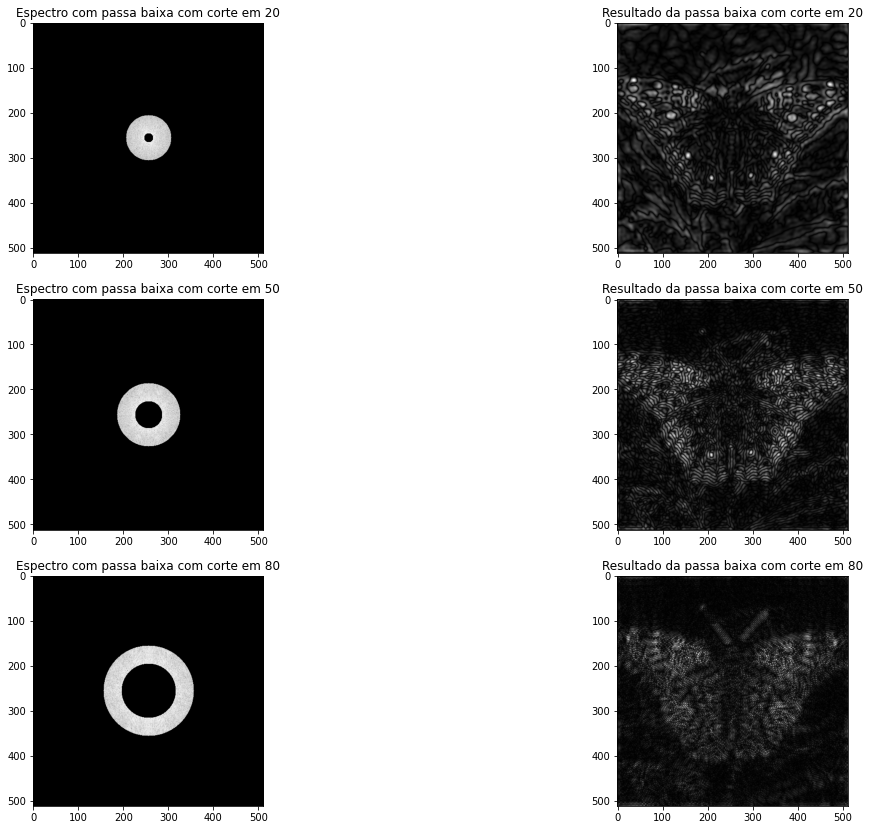

In [12]:
img = io.imread('png_images/butterfly.png')
original = np.fft.fft2(img)
center = np.fft.fftshift(original)
lp20 = center * bandPass(30, 40, img.shape)
lp50 = center * bandPass(50, 40, img.shape)
lp80 = center * bandPass(80, 40, img.shape)

i_lp20 = np.fft.ifft2(lp20)
i_lp50 = np.fft.ifft2(lp50)
i_lp80 = np.fft.ifft2(lp80)

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)
img = io.imread('png_images/butterfly.png')
plt.subplot(321), plt.imshow(np.log(1+np.abs(lp20)), "gray"), plt.title("Espectro com passa baixa com corte em 20")
plt.subplot(322), plt.imshow(np.abs(i_lp20), "gray"), plt.title("Resultado da passa baixa com corte em 20")

plt.subplot(323), plt.imshow(np.log(1+np.abs(lp50)), "gray"), plt.title("Espectro com passa baixa com corte em 50")
plt.subplot(324), plt.imshow(np.abs(i_lp50), "gray"), plt.title("Resultado da passa baixa com corte em 50")

plt.subplot(325), plt.imshow(np.log(1+np.abs(lp80)), "gray"), plt.title("Espectro com passa baixa com corte em 80")
plt.subplot(326), plt.imshow(np.abs(i_lp80), "gray"), plt.title("Resultado da passa baixa com corte em 80")


plt.savefig('results/bandPassFreqComp.png', bbox_inches='tight')

# Compressão
## Função de compressão com limite na magnetude

In [60]:
def compressThreshhold(img, thresh):
    maskMatrix = np.abs(img) > thresh
    # percentage calculation
    pixelCount =  img.shape[0] * img.shape[1]
    keptPixels = np.sum(maskMatrix)
    percentage = (keptPixels/pixelCount)*100
    return img * maskMatrix, percentage

## Aplicando compressão

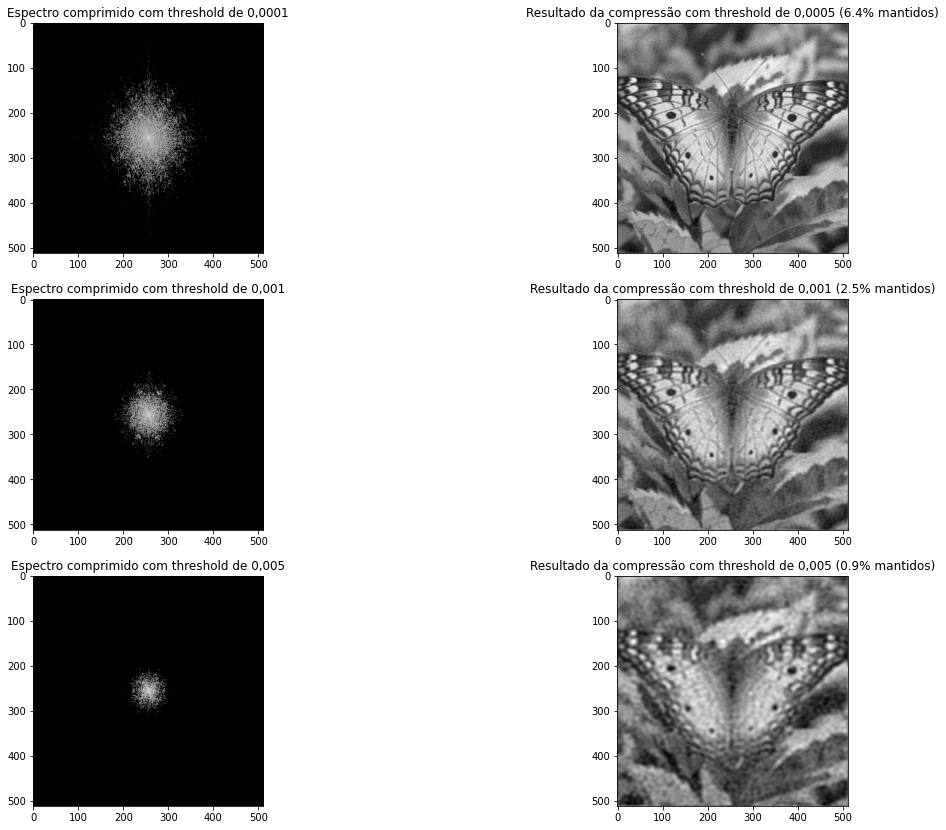

In [79]:
img = io.imread('png_images/butterfly.png')
original = np.fft.fft2(img)
center = np.fft.fftshift(original)
getThresh = lambda thresh: np.max(np.abs(center))*thresh

thresh= getThresh(0.0005)
cmpThresh, percentage = compressThreshhold(center, thresh)

thresh= getThresh(0.001)
cmpThresh2, percentage2 = compressThreshhold(center, thresh)

thresh= getThresh(0.002)
cmpThresh3, percentage3 = compressThreshhold(center, thresh)

i_1 = np.fft.ifft2(cmpThresh)
i_2 = np.fft.ifft2(cmpThresh2)
i_3 = np.fft.ifft2(cmpThresh3)

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)
plt.subplot(321), plt.imshow(np.log(1+np.abs(cmpThresh)), "gray"), plt.title("Espectro comprimido com threshold de 0,0001")
plt.subplot(322), plt.imshow(np.abs(i_1), "gray"), plt.title("Resultado da compressão com threshold de 0,0005 ({:.1f}% mantidos)".format(percentage))

plt.subplot(323), plt.imshow(np.log(1+np.abs(cmpThresh2)), "gray"), plt.title("Espectro comprimido com threshold de 0,001")
plt.subplot(324), plt.imshow(np.abs(i_2), "gray"), plt.title("Resultado da compressão com threshold de 0,001 ({:.1f}% mantidos)".format(percentage2))

plt.subplot(325), plt.imshow(np.log(1+np.abs(cmpThresh3)), "gray"), plt.title("Espectro comprimido com threshold de 0,005")
plt.subplot(326), plt.imshow(np.abs(i_3), "gray"), plt.title("Resultado da compressão com threshold de 0,005 ({:.1f}% mantidos)".format(percentage3))


plt.savefig('results/compressionCmpThresh.png', bbox_inches='tight')